<a href="https://colab.research.google.com/github/Yogesh-ProITBridge/Time-series-Project/blob/main/linear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Time Series/gold_data.csv")

In [ ]:
df

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
...,...,...
5649,05-05-2024,7068
5650,04-05-2024,7068
5651,03-05-2024,7039
5652,02-05-2024,7069


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.rename(columns={'Gold Price':'Gold_Price'}, inplace = True)

In [ ]:
df

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,5
5650,2024-05-04,7068,2024,5,4
5651,2024-05-03,7039,2024,5,3
5652,2024-05-02,7069,2024,5,2


In [ ]:
df.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

In [ ]:
df.head()

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29


In [ ]:
X = df[['Year', 'Month', 'Day']]
y = df['Gold_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adj_r2}")


Mean Absolute Error (MAE): 417.1593713238744
Mean Squared Error (MSE): 272602.3907287904
Root Mean Squared Error (RMSE): 522.113388766071
R-squared (R²): 0.8452097773433714
Adjusted R-squared: 0.8447977359343476


Predicted Gold Price for June 1, 2024: 5516.177131351433


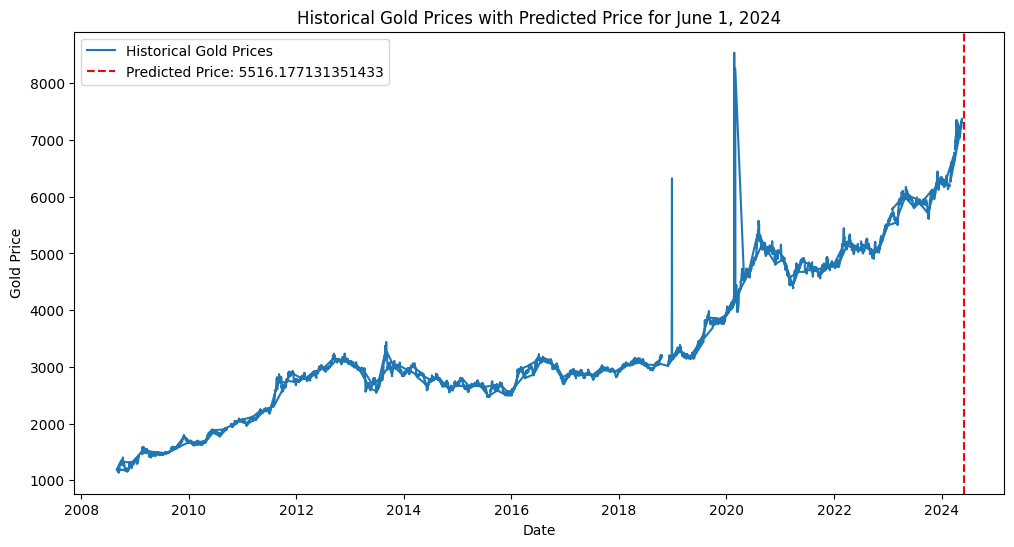

In [ ]:
import matplotlib.pyplot as plt

def predict_gold_price(year, month, day):
    # Prepare the input features
    input_features = pd.DataFrame({
        'Year': [year],
        'Month': [month],
        'Day': [day]
    })
    # Make prediction
    predicted_price = model.predict(input_features)[0]
    return predicted_price


predicted_price = predict_gold_price(2024, 5, 30)
print(f"Predicted Gold Price for June 1, 2024: {predicted_price}")

# Optional: Visualize the prediction in context with the existing data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Gold_Price'], label='Historical Gold Prices')
plt.axvline(pd.Timestamp('2024-06-01'), color='r', linestyle='--', label=f'Predicted Price: {predicted_price}')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Historical Gold Prices with Predicted Price for June 1, 2024')
plt.legend()
plt.show()